# ITMAL Exercise

REVISIONS| |
---------| |
2018-0318| CEF, initial.
2018-0321| CEF, synced with MLP moon exercise.
2018-0323| CEF, minor updated and spell checked.
2019-0930| CEF, updated for ITMAL E19.


## Keras Multi-Layer Perceptrons (MLP's) on MNIST-data


### Qa Using a Keras MLP on the MNIST-data

Now, make a Keras `Sequential` model and fit it to the MNIST data, re-using as much of the code form the `mlp_moon.ipynb` as you can.

Then try to change the number of hidden layers and the neurons in each layer, looking for increases in test accuracy via ``score``. 

Publish your best score for your model in Blackboard, see link under L06. We use categorical accuracy for score---eventhough a $F_1$ score could say more. Publish you result like
```
   ITMALGrpXY: score=0.76, a 10-20-30-20-10 MLP, takes looong to train
```
or similar


NOTE: you probably need to scale/normalize the MNIST data before a fit, and no 2D-decision boundaries can be drawn from the 784-dimension MNIST data.

In [1]:
fig_cnt = 0
%matplotlib inline
from sklearn.datasets import fetch_openml

def MNIST_GetDataSet():
    # Load data from https://www.openml.org/d/554
    X, y = fetch_openml('mnist_784', return_X_y=1) # needs to return X, y, replace '??' with suitable parameters! 
    # Convert at scale (not always needed)
    #X = X / 255.
    return (X, y)

def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    global fig_cnt
    plt.figure(fig_cnt)
    fig_cnt += 1
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()
    
X, y = MNIST_GetDataSet()


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import numpy as np
from time import time

np.random.seed(1337)
num_classes = 10
X = X/255.0 #normalise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1337)
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

Using TensorFlow backend.


In [3]:
from libitmal import kernelfuns as itmalkernefuns
itmalkernefuns.EnableGPU()

In [4]:
#from libitmal import kernelfuns as itmalkernelfuns
#itmalkernelfuns.EnableGPU()                              
#itmalkernelfuns.DisableGPU()   

from keras.layers import Dropout


# Build Keras model 
model = Sequential()
#model.add(Dense(input_dim=784, units=8, activation="tanh", kernel_initializer="normal"))
#model.add(Dense(units=2, activation="softmax", input_shape=(784,)))
model.add(Dropout(0.2, input_shape=(784,)))
model.add(Dense(units=128, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
#model.add(Dense(units=100, activation='sigmoid', input_shape=(784,)))
#model.add(Dropout(0.2))
#model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))



optimizer = SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer,
              metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])
model.summary()
# Make data


assert y.ndim==1
assert y_train.ndim==2
assert y_test.ndim ==2

# Train
VERBOSE     = 1
EPOCHS      = 100

start = time()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 128, epochs=EPOCHS, verbose=VERBOSE)
t = time()-start

print(f"OK, training time={t:0.1f}")




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 109,386
T

49000/49000 [==============================] - 7s 137us/step - loss: 2.2868 - categorical_accuracy: 0.1417 - mean_squared_error: 0.0897 - mean_absolute_error: 0.1787 - val_loss: 2.2383 - val_categorical_accuracy: 0.3373 - val_mean_squared_error: 0.0886 - val_mean_absolute_error: 0.1786
Epoch 20/100
49000/49000 [==============================] - 8s 160us/step - loss: 2.2843 - categorical_accuracy: 0.1424 - mean_squared_error: 0.0896 - mean_absolute_error: 0.1786 - val_loss: 2.2346 - val_categorical_accuracy: 0.3497 - val_mean_squared_error: 0.0886 - val_mean_absolute_error: 0.1785
Epoch 21/100
49000/49000 [==============================] - 6s 125us/step - loss: 2.2778 - categorical_accuracy: 0.1490 - mean_squared_error: 0.0895 - mean_absolute_error: 0.1785 - val_loss: 2.2308 - val_categorical_accuracy: 0.3720 - val_mean_squared_error: 0.0885 - val_mean_absolute_error: 0.1784
Epoch 22/100
49000/49000 [==============================] - 8s 156us/step - loss: 2.2737 - categorical_accuracy: 

49000/49000 [==============================] - 8s 171us/step - loss: 2.1634 - categorical_accuracy: 0.2440 - mean_squared_error: 0.0868 - mean_absolute_error: 0.1758 - val_loss: 2.1143 - val_categorical_accuracy: 0.5389 - val_mean_squared_error: 0.0857 - val_mean_absolute_error: 0.1755: 2.1684 - categorical_accuracy: - ETA: 0s - loss: 2.1645 - categorical_accuracy: 0.2433 - mean_squared_error: 0.0869 - mean_absolute_erro
Epoch 46/100
49000/49000 [==============================] - 7s 138us/step - loss: 2.1564 - categorical_accuracy: 0.2493 - mean_squared_error: 0.0867 - mean_absolute_error: 0.1756 - val_loss: 2.1078 - val_categorical_accuracy: 0.5417 - val_mean_squared_error: 0.0856 - val_mean_absolute_error: 0.1753
Epoch 47/100
49000/49000 [==============================] - 8s 160us/step - loss: 2.1497 - categorical_accuracy: 0.2549 - mean_squared_error: 0.0865 - mean_absolute_error: 0.1754 - val_loss: 2.1011 - val_categorical_accuracy: 0.5441 - val_mean_squared_error: 0.0854 - val_mea

Epoch 72/100
49000/49000 [==============================] - 6s 129us/step - loss: 1.9419 - categorical_accuracy: 0.3765 - mean_squared_error: 0.0808 - mean_absolute_error: 0.1684 - val_loss: 1.8710 - val_categorical_accuracy: 0.5870 - val_mean_squared_error: 0.0789 - val_mean_absolute_error: 0.1675
Epoch 73/100
49000/49000 [==============================] - 8s 154us/step - loss: 1.9310 - categorical_accuracy: 0.3811 - mean_squared_error: 0.0805 - mean_absolute_error: 0.1680 - val_loss: 1.8594 - val_categorical_accuracy: 0.5878 - val_mean_squared_error: 0.0785 - val_mean_absolute_error: 0.1670
Epoch 74/100
49000/49000 [==============================] - 6s 131us/step - loss: 1.9163 - categorical_accuracy: 0.3910 - mean_squared_error: 0.0801 - mean_absolute_error: 0.1675 - val_loss: 1.8476 - val_categorical_accuracy: 0.5901 - val_mean_squared_error: 0.0782 - val_mean_absolute_error: 0.1666
Epoch 75/100
49000/49000 [==============================] - 6s 129us/step - loss: 1.9058 - categoric

49000/49000 [==============================] - 6s 131us/step - loss: 1.6419 - categorical_accuracy: 0.4862 - mean_squared_error: 0.0716 - mean_absolute_error: 0.1547 - val_loss: 1.5398 - val_categorical_accuracy: 0.6430 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.1522
Epoch 100/100
49000/49000 [==============================] - 8s 157us/step - loss: 1.6303 - categorical_accuracy: 0.4897 - mean_squared_error: 0.0712 - mean_absolute_error: 0.1541 - val_loss: 1.5280 - val_categorical_accuracy: 0.6463 - val_mean_squared_error: 0.0676 - val_mean_absolute_error: 0.1516
OK, training time=838.7


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#print(history.history)
score = model.evaluate(X_test, y_test, verbose=0)

print(f"Training time: {t:0.1f} sec")
print(f"Test loss:     {score[0]}") # loss is score 0 by definition?
print(f"Test accuracy: {score[1]}")
print(f"All scores in history: {score}")

Training time: 838.7 sec
Test loss:     1.527978215717134
Test accuracy: 0.6462857142857142
All scores in history: [1.527978215717134, 0.6462857142857142, 0.06757115110045388, 0.15155920931271144]


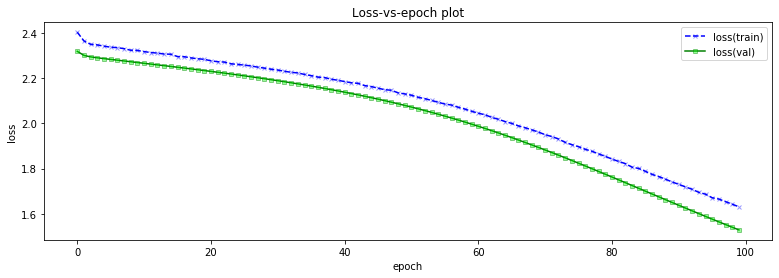

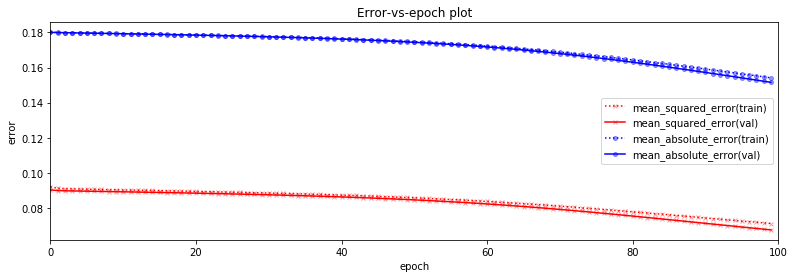

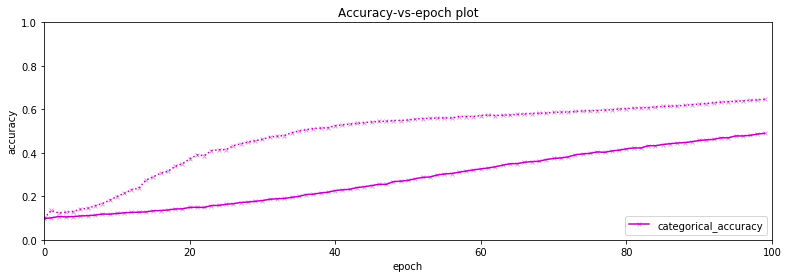

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
N=4
FX=60
FY=4
A=0.4
S=4


# Plot loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 2)
plt.plot(history.history["loss"]    , "b--x", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_loss"], "g-s" , markerfacecolor=(0, 1, 0, A), markersize=S)
plt.legend(loc="best", labels=("loss(train)","loss(val)"))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss-vs-epoch plot")
plt.show()

# Plot all metrics + loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 3)
plt.plot(history.history["mean_squared_error"],      "r:x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["val_mean_squared_error"],  "r-x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["mean_absolute_error"],     "b:o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_mean_absolute_error"], "b-o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.xlabel("epoch")
plt.ylabel("error")
plt.xlim((0, EPOCHS))
plt.legend(loc="best", labels=("mean_squared_error(train)",  "mean_squared_error(val)", 
                               "mean_absolute_error(train)", "mean_absolute_error(val)", 
                               "loss(categorical_crossentropy,train)", "loss(categorical_crossentropy,val)"))
plt.title("Error-vs-epoch plot")
plt.show()

# Plot accuracy
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 4)
plt.plot(history.history["categorical_accuracy"],     "m-x", markerfacecolor=(1, 0, 1, A), markersize=S)
plt.plot(history.history["val_categorical_accuracy"], "m:x", markerfacecolor=(1, 0, 1, A), markersize=S)
ax.set_ylim([0,1])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xlim((0, EPOCHS))
plt.legend(loc="lower right", labels=("categorical_accuracy",))
plt.title("Accuracy-vs-epoch plot")
plt.show()

#### Results

The format is [Activation], [units], ... [units], lr=[learning rate], dropout=[dropout coeff], [notes]

Adam optimizer is used unless otherwise noted.


Sigmoid, 32, 10, lr=0.002, dropout = 0.2, 100 Epochs
loss: 0.1741 - categorical_accuracy: 0.9443 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0174 - val_loss: 0.1265 - val_categorical_accuracy: 0.9623 - val_mean_squared_error: 0.0056 - val_mean_absolute_error: 0.0110
OK, training time=910.0

Sigmoid, 1000, 500, 200, 10, lr=0.002, dropout = 0.5, not on input, 50 Epochs
loss: 0.0150 - categorical_accuracy: 0.9952 - mean_squared_error: 7.2808e-04 - mean_absolute_error: 0.0013 - val_loss: 0.0961 - val_categorical_accuracy: 0.9822 - val_mean_squared_error: 0.0030 - val_mean_absolute_error: 0.0038

Sigmoid, 1000, 500, 200, 10, lr=0.002, dropout = 0.2 including input, 50 Epochs
7s 148us/step - loss: 0.0130 - categorical_accuracy: 0.9956 - mean_squared_error: 6.6439e-04 - mean_absolute_error: 0.0012 - val_loss: 0.0707 - val_categorical_accuracy: 0.9845 - val_mean_squared_error: 0.0026 - val_mean_absolute_error: 0.0034
OK, training time=367.6

Sigmoid, 1000, 700, 300, 100, 10, lr=0.002, dropout = 0.2 including input, 75 Epochs
8s 173us/step - loss: 0.0093 - categorical_accuracy: 0.9970 - mean_squared_error: 4.6589e-04 - mean_absolute_error: 8.4933e-04 - val_loss: 0.0930 - val_categorical_accuracy: 0.9838 - val_mean_squared_error: 0.0028 - val_mean_absolute_error: 0.0035
OK, training time=645.5

Sigmoid, 2000, 1000, 500, 10 lr=0.002, dropout = 0.2 including input, 100 Epochs
14s 292us/step - loss: 0.0058 - categorical_accuracy: 0.9984 - mean_squared_error: 2.5794e-04 - mean_absolute_error: 4.6351e-04 - val_loss: 0.0922 - val_categorical_accuracy: 0.9856 - val_mean_squared_error: 0.0026 - val_mean_absolute_error: 0.0031
OK, training time=1440.3

Sigmoid, 2000, 1000, 500, 200, 100, 10 lr=0.001, dropout = 0.2 including input, 200 Epochs
15s 306us/step - loss: 0.0030 - categorical_accuracy: 0.9992 - mean_squared_error: 1.3906e-04 - mean_absolute_error: 2.6317e-04 - val_loss: 0.1075 - val_categorical_accuracy: 0.9851 - val_mean_squared_error: 0.0027 - val_mean_absolute_error: 0.0031
OK, training time=3019.5

#### Discussion

It is observed that larger neural networks are prone to overfitting. To combat this we have tried to use dropout layers with limited success.
The maximum achievable accuracy with MLPs seems to be around 98.5% based on our tests. From research we have found it to be possible to achieve higher accuracy using convolutional neural networks. 